# Data collection and storage project
# *Pattern analysis for a ride-sharing company*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Description-of-the-data" data-toc-modified-id="Description-of-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Description of the data</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Library-version-check-and-update" data-toc-modified-id="Library-version-check-and-update-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Library version check and update</a></span></li><li><span><a href="#Input-data" data-toc-modified-id="Input-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Input data</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Descriptive statistics</a></span><ul class="toc-item"><li><span><a href="#Trips" data-toc-modified-id="Trips-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Trips</a></span></li><li><span><a href="#Neighborhoods" data-toc-modified-id="Neighborhoods-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Neighborhoods</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Data-type-change" data-toc-modified-id="Data-type-change-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Data type change</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Top-10-neighborhoods-in-terms-of-drop-offs" data-toc-modified-id="Top-10-neighborhoods-in-terms-of-drop-offs-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Top 10 neighborhoods in terms of drop-offs</a></span></li><li><span><a href="#Taxi-companies-and-number-of-rides" data-toc-modified-id="Taxi-companies-and-number-of-rides-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Taxi companies and number of rides</a></span></li></ul></li><li><span><a href="#Statistical-hypotheses-testing" data-toc-modified-id="Statistical-hypotheses-testing-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Statistical hypotheses testing</a></span><ul class="toc-item"><li><span><a href="#The-average-duration-of-rides-from-Loop-neighborhood-to-O'Hare-International-Airport-changes-on-rainy-Saturdays." data-toc-modified-id="The-average-duration-of-rides-from-Loop-neighborhood-to-O'Hare-International-Airport-changes-on-rainy-Saturdays.-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays.</a></span><ul class="toc-item"><li><span><a href="#Step-1:-the-null-and-alternative-hypotheses" data-toc-modified-id="Step-1:-the-null-and-alternative-hypotheses-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>Step 1: the null and alternative hypotheses</a></span></li><li><span><a href="#Step-2:-Set-the-criteria-for-a-decision" data-toc-modified-id="Step-2:-Set-the-criteria-for-a-decision-10.1.2"><span class="toc-item-num">10.1.2&nbsp;&nbsp;</span>Step 2: Set the criteria for a decision</a></span></li><li><span><a href="#Step-3:-Compute-the-test-statistic" data-toc-modified-id="Step-3:-Compute-the-test-statistic-10.1.3"><span class="toc-item-num">10.1.3&nbsp;&nbsp;</span>Step 3: Compute the test statistic</a></span></li><li><span><a href="#Step-4:-Make-a-decision" data-toc-modified-id="Step-4:-Make-a-decision-10.1.4"><span class="toc-item-num">10.1.4&nbsp;&nbsp;</span>Step 4: Make a decision</a></span></li></ul></li></ul></li></ul></div>

### Goal

Prepare a report for Zuber, a new ride-sharing company that's launching in Chicago, to identify patterns that determine passenger preferences and the impact of external factors on rides.

### Hypothesis
 
The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays.

### Description of the data

**project_sql_result_01.csv** 

It contains the following data:
- *company_name*: taxi company name
- *trips_amount*: the number of rides for each taxi company on November 15-16, 2017.

**project_sql_result_04.csv**

It contains the following data:
- *dropoff_location_name*: Chicago neighborhoods where rides ended
- *average_trips*: the average number of rides that ended in each neighborhood in November 2017.

**project_sql_result_01.csv**

It contains the following data:

- *start_ts*: pickup date and time
- *weather_conditions* : weather conditions at the moment the ride started
- *duration_seconds*: ride duration in seconds

### Imports

In [18]:
import pandas as pd
import scipy
import matplotlib

from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None)

print("Setup Complete")

Setup Complete


### Library version check and update

In [19]:
version_dict = {pd:'1.0.1', scipy:'1.6.0', matplotlib:'3.1.3'}

In [20]:
def get_value(my_key):
    """
    If the val can be found in the dictinary.values() list, 
    returns the key of the dictionary item in which the val was found.
    """
    wrong_val = []
    
    for key, value in version_dict.items(): 
        try:
            if key == my_key: 
                return value
        except:
            wrong_val.append(key, value)

In [21]:
for lib in version_dict.keys():
    if lib.__version__ != get_value(lib):
        print("Warning: to be able to run this code correctly, please install the version", get_value(lib), 'of', lib)

### Input data

In [22]:
try:
    df_trips = pd.read_csv('project_sql_result_01.csv')
    df_neighborhoods = pd.read_csv('project_sql_result_04.csv')
    
except:
    df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')    
    df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

### Descriptive statistics
#### Trips

In [23]:
df_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [24]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Notes for data preprocessing:
- No missing values;
- Correct column names and data type.

In [25]:
df_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Notes for data preprocessing:
- `trips_amount` ranges from 2 to almost 20 000, there is a significant difference between the mean and median values, standard deviation is quite high, so we can assume that the distribution is not normal, positively skewed.

#### Neighborhoods

In [26]:
df_neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [27]:
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Notes for data preprocessing:
- No missing values;
- Correct column names and data type. `average_trips` column can be converted to ineger to simplify further analysis.

In [28]:
df_neighborhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Notes for data preprocessing:
- `average_trips` ranges from 2 to more than 10 000, there is a significant difference between the mean and median values, standard deviation is quite high, so we can assume that the distribution is not normal, positively skewed.

### Preprocessing
#### Duplicates
Let's check if any rows are duplicated in any data frames.

In [29]:
df_trips.duplicated().sum()

0

In [30]:
df_neighborhoods.duplicated().sum()

0

#### Data type change

In [31]:
df_neighborhoods['average_trips'] = df_neighborhoods['average_trips'].astype(int)

### EDA
#### Top 10 neighborhoods in terms of drop-offs

In [32]:
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips')

In [33]:
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [34]:
top_10_neighborhoods['%'] = top_10_neighborhoods['average_trips']/(top_10_neighborhoods['average_trips']).sum()
top_10_neighborhoods = top_10_neighborhoods.sort_values(by='average_trips', ascending=False).reset_index(drop=True)

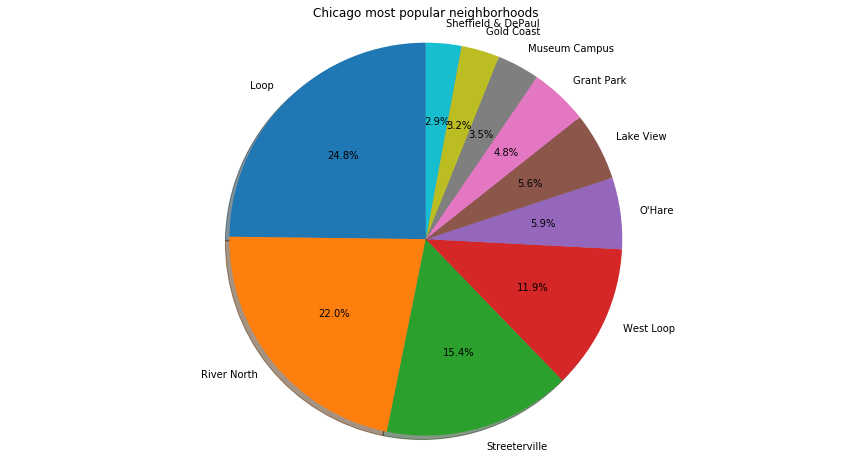

In [35]:
fig, ax = plt.subplots(1,figsize=(15,8))

labels = top_10_neighborhoods['dropoff_location_name']
sizes = top_10_neighborhoods['%']

ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Chicago most popular neighborhoods");

The "Loop" neighborhood is the most popular one - almost a quarter of all taxi rides end there. The second biggest neighborhood is "River North" - around 20% of rides end there, the 3rd and 4th are "Streeterville" and "West Loop", respectively. The rest of the top 10 Chicago neighborhoods account for 25% of all taxi rides.

#### Taxi companies and number of rides
First, let's combine all the small companies with less than 100 trips into a group "other companies".

In [36]:
def reduce_companies(row):
    """
    The function groups all the company names with less than 100 trips amount into "other companies.
    """
    
    trips_amount = row['trips_amount']
    company_name = row['company_name']
    if trips_amount > 100:
        return company_name
    return 'other companies' 

In [37]:
df_trips['company_name'] = df_trips.apply(reduce_companies, axis=1)

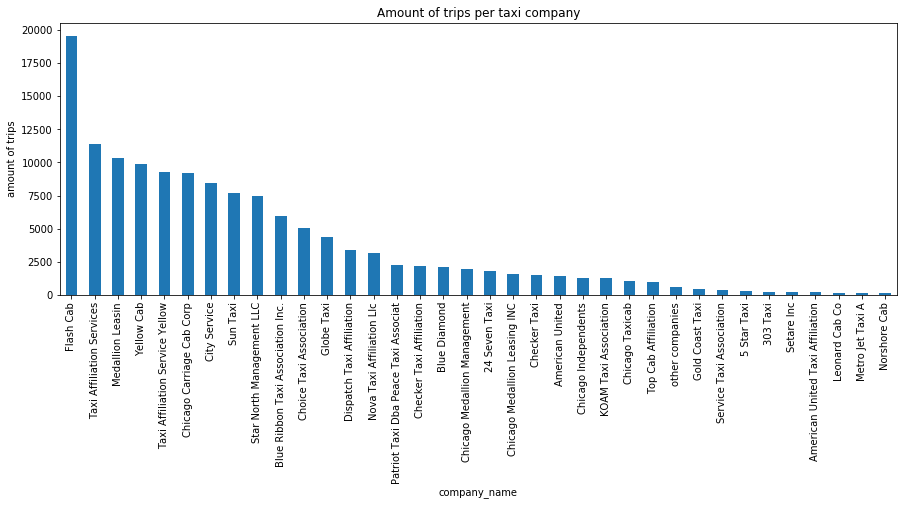

In [38]:
plt.figure(figsize=(15,5))
df_trips.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Amount of trips per taxi company')
plt.ylabel('amount of trips');

Now, let's make this information a bit more vizual and easy to interpret.

In [39]:
df_trips['market_share'] = df_trips['trips_amount']/(df_trips['trips_amount']).sum()
df_trips = df_trips.sort_values(by='trips_amount', ascending=False).reset_index(drop=True)

others_trips = df_trips.loc[11:,'trips_amount'].sum()
others_share = df_trips.loc[11:,'market_share'].sum()

df_trips = df_trips[0:11].append({'company_name':'others', 'trips_amount':others_trips, 'market_share':others_share}, ignore_index=True)

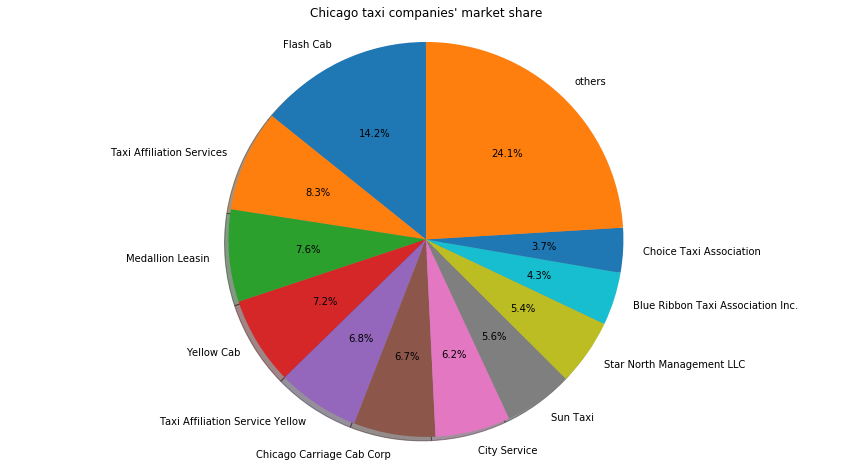

In [40]:
fig, ax = plt.subplots(1,figsize=(15,8))

labels = df_trips['company_name']
sizes = df_trips['market_share']

ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Chicago taxi companies' market share");

As we see, the market of taxi services is quite competitive - we see almost a 100 different companies. The biggest company (in terms of amounts of trips) is "Flash Cab" - it occupies almost 15% of the market. All the larger companies together account for almost 75% of the market, while smaller companies (each occupying less than 1%) together account for almost a quarter of the market. 

### Statistical hypotheses testing
#### The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays.

First, let's import the neccessary data to test this hypothesis.

In [41]:
try:
    df_weather = pd.read_csv('project_sql_result_07.csv')
    
except:
    df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')    

In [42]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


##### Step 1: the null and alternative hypotheses
**H0:** The means of two statistical populations are equal. In our case it means that the average duration of a trip with "Good" `weather_conditions` is the same as the average duration of a trip with "Bad" `weather_conditions`.

**H1:** The means of two statistical populations are not equal. In our case it means that the average duration of a trip with "Good" `weather_conditions` is not the same as the average duration of a trip with "Bad" `weather_conditions`, although we do not specify here which one is more.

##### Step 2: Set the criteria for a decision

In behavioral science, the level of significance is typically set at 5% and we will choose this criteria as well. When the probability of obtaining a sample mean is less than 5% if the null hypothesis were true, then we reject the value stated in the null hypothesis.

##### Step 3: Compute the test statistic

In order to test our hypothesis that the means of two statistical populations are equal based on samples taken from them, we will apply the method `scipy.stats.ttest_ind()`. 

The method takes the following parameters: 

- `array1`, `array2` are arrays containing the samples. We will use the `monthly_profit` variables we calculated earlier for both plans;
- `equal_var` is an optional parameter that specifies whether or not the variances of the populations should be considered equal. To set this parameter let's test whether the variances of our samples are the same.

In [43]:
sample_1 = df_weather[df_weather['weather_conditions'] == 'Good'].dropna()['duration_seconds']
sample_2 = df_weather[df_weather['weather_conditions'] == 'Bad'].dropna()['duration_seconds']

In [44]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

The p-value is slightly more than 5% (5.33%) suggests that the populations do have equal variances. Hence we will set the `equal_var` parameter to True.

In [45]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
                        sample_1, 
                        sample_2, 
                        equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


##### Step 4: Make a decision

Based on the results of the test statistic we reach **significance**: the decision is to **reject the null hypothesis**. The equality of samples' means is associated with a low probability of occurrence (less than 5%) when the null hypothesis is true. It means that the average duration of rides from Loop neighborhood to O'Hare International Airport **indeed changes** on rainy Saturdays.

# Conclusion

In this report we have **analyzed taxi passengers' behavior in order to identify patterns that determine their preferences and the impact of external factors on rides**.

First of all, we have familiarized ourselves with the data by performing the descriptive statistics. Based on that analysis, we have converted `average_trips` variable to the appropriate data type to make the further analysis easier. We didn't find any missing or duplicated values. 

**In the following section we have performed an exploratory data analysis and reached the following conclusions**:
- The "Loop" neighborhood is the most popular one - almost a quarter of all taxi rides end there. The second biggest neighborhood is "River North" - around 20% of rides end there, the 3rd and 4th are "Streeterville" and "West Loop", respectively. The rest of the top 10 Chicago neighborhoods account for 25% of all taxi rides;
- The market of taxi services is quite competitive - we see almost a 100 different companies. The biggest company (in terms of amounts of trips) is "Flash Cab" - it occupies almost 15% of the market. All the larger companies together account for almost 75% of the market, while smaller companies (each occupying less than 1%) together account for almost a quarter of the market.

**Next step was statistical hypotheses testing. We tested the following hypothesis**:
The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays.

Based on statistical tests, we have **rejected the null** - the average duration of a trip with "Good" weather_conditions is not the same as the average duration of a trip with "Bad" weather_conditions.